In [128]:
#get text
import numpy as np
import re
filename1="nonactinide50yrs.txt"
filename2="actinide50yrs.txt"
LINE=[]
file=open(filename1)
for line in file:
    LINE=np.append(LINE,line)
file.close()    
file=open(filename2)
for line in file:
    LINE=np.append(LINE,line)
file.close()
zaid=[]
activity=[]


#re expressions to read index array
for i in range(len(LINE)):
    y=re.split(r'\s*',LINE[i])
    zaid=np.append(zaid,y[2]) #AAAZZZ
    activity=np.append(activity,y[4]) #
    
print("Zaid","Activity [Ci]")
for i in range(len(zaid)):
    if activity[i]!='0.000E+00':
        print(zaid[i],activity[i])
    #activty and zaid in array w/ length

Zaid Activity [Ci]
6014 1.775E-03
34079 4.336E-01
34082 7.665E-16
36085 2.344E+02
37087 1.436E-05
38090 1.457E+04
39090 1.458E+04
40093 1.266E+00
41094 4.519E-04
43099 9.520E+00
46107 1.230E-01
48113 2.411E-14
49115 4.141E-12
50126 5.067E-01
52123 1.099E-12
53129 2.373E-02
55135 3.074E-01
55137 2.684E+04
57138 4.296E-10
58142 4.432E-11
60144 1.405E-09
60145 1.864E-11
61147 1.425E-01
62147 2.946E-06
62148 4.287E-11
62149 1.736E-12
62151 8.596E+01
63152 2.763E-02
63154 1.340E+02
63155 2.440E+00
64152 2.209E-13
90230 2.224E-04
90232 3.253E-10
91231 1.296E-05
92232 3.549E-03
92233 5.889E-05
92234 6.445E-01
92235 1.713E-03
92236 1.225E-01
92238 1.316E-01
93236 1.641E-05
93237 2.418E-01
94238 2.214E+03
94239 1.924E+02
94240 3.190E+02
94241 7.631E+03
94242 2.279E+00
95241 2.438E+03


//anaconda/lib/python3.5/re.py:203: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [127]:
#THERE IS SOMETHING WRONG WITH THE WAY I AM INPUTTING THE NUCLIDE ZAID 

from pyne import data
from pyne import nucname
#information about nuclide
#zaid=27060 #CO60
ENERGY=[]
GAMMAs=[]
BRANCH=[]
Bq=float(3.7e10)
BQ_activity=[]
import re
#convert activty to float and into BQ
for i in range(len(activity)):
    string=activity[i]
    BQ_activity=np.append(BQ_activity, float(string.replace("E","e")))
#convert to BQ
ACTIVITY=BQ_activity*Bq
print("---------------------------------------------------------")
for m in range(len(zaid)):
    #dont include zero activity nuclides
    if ACTIVITY[m]!=0:
        ID=zaid[m]
        #convert MCNP zaid to element name to print
        name=nucname.name(nucname.mcnp_to_id(ID))
        #convert MCNP zaid to pyneID for info grabbing
        pyneID=nucname.mcnp_to_id(ID)
        #info about nuclide chains including energies and branch ratios
        decay_pairs=data.gamma_from_to_byparent(pyneID)
        decay_pairs = data.gamma_from_to_byparent(pyneID)
        energies=data.gamma_energy(pyneID)
        intensities = data.gamma_photon_intensity(pyneID)
        #dont include nuclides with nonzero activities but arent gamma emitters
        if len(decay_pairs)!=0:
            print("Parent nuclide",name)
            print("Decay chain from parent",decay_pairs)
            for i in range(len(energies)):
                for j in range(1):
                    #for some reason some decay pairs are (0,0), dont include these
                    if (decay_pairs[i][0])!=0:
                        #some are negative for some reason....
                        k=abs(decay_pairs[i][j])
                        print(nucname.name(k))
                        print(energies[i][0])
                        print(intensities[i][0])
                        #append each interation
                        ENERGY=np.append(ENERGY,energies[i][0])
                        BRANCH=np.append(BRANCH,intensities[i][0])
                        GAMMAS=np.append(GAMMAS,BRANCH[i]*ACTIVITY[m])
            print("---------------------------------------------------------")

---------------------------------------------------------
Parent nuclide Kr85
Decay chain from parent [(370850002, 370850001), (370850001, 370850000), (370850003, 370850001), (370850003, 370850000)]
Rb85M
129.81
0.0001
Rb85M
151.18
0.0005
Rb85M
362.81
0.0005
Rb85M
513.997
100.0
---------------------------------------------------------
Parent nuclide Y90
Decay chain from parent [(400900001, 400900000), (400900002, 400900000)]
Zr90M
1760.7
nan
Zr90M
2186.242
1.4e-06
---------------------------------------------------------
Parent nuclide Zr93
Decay chain from parent [(410930001, 410930000)]
Nb93M
30.77
0.00043
---------------------------------------------------------
Parent nuclide Nb94
Decay chain from parent [(420940002, 420940001), (420940001, 420940000)]
Mo94M
702.65
nan
Mo94M
871.091
nan
---------------------------------------------------------
Parent nuclide Tc99
Decay chain from parent [(440990001, 440990000)]
Ru99M
89.5
100.0
------------------------------------------------------

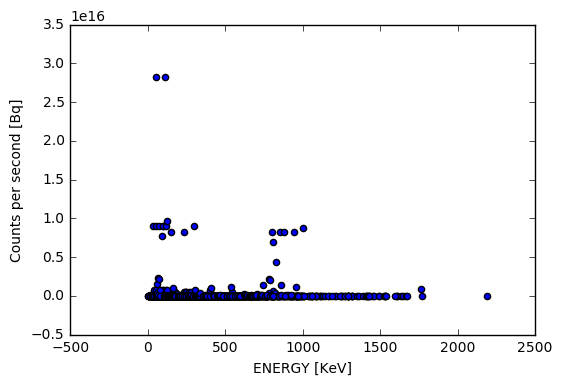

In [125]:
import matplotlib.pyplot as plt

for i in range(len(ENERGY)):
    plt.scatter(ENERGY[i],GAMMAS[i])
#plt.title("Gamma ray spectrum for 55 year decayed assembly")
plt.xlabel("ENERGY [KeV]")
plt.ylabel("Counts per second [Bq]")
plt.show()





In [104]:
#print(len(GAMMAS))
#print(len(ENERGY))
for i in range(100):
    print(ENERGY[i],GAMMAS[i])

1156
1155
129.81 902060000000.0
151.18 867280000.0
362.81 4336400000.0
513.997 4336400000.0
1760.7 8.6728e+14
2186.242 53946000000.0
30.77 269730000000.0
702.65 4684200.0
871.091 1672.03
89.5 8360.15
497.3 35224000.0
17.7 1.53217e-05
21.646 1874790.0
22.7 9373950.0
23.28 9373950.0
42.641 1.87479e+12
64.281 nan
86.938 26247.06
87.567 8061597.0
39.578 nan
283.5 87801.0
661.657 99308000000.0
788.742 496540000000.0
1435.795 0.00158952
76.073 0.0079476
121.22 527250.0
197.299 2636250.0
21.543 2636250.0
118.97 318052000.0
121.7817 102231.0
125.68 511155.0
137.56 511155.0
148.0 102231000000.0
150.13 nan
172.1 1431.234
174.8 nan
192.6 nan
195.22 104275.62
207.03 125744.13
207.64 276023700.0
209.3 17685963000.0
209.41 1380118500.0
209.97 26580060000.0
210.95 24637671000.0
212.43 102231000000.0
237.1 7677548100.0
239.33 592939.8
241.0 86998581000.0
244.6974 102231000000.0
251.633 102231000000.0
269.84 4191.471
271.08 1022310000.0
272.41 122677.2
275.42 102231000000.0
285.98 2044620.0
286.5 10969

In [14]:
from pyne import data
from pyne import nucname
#information about nuclide
#zaid=27060 #CO60
zaid=6014
name=nucname.name(nucname.mcnp_to_id(zaid))
print("Parent nuclide",name)
pyneID=nucname.mcnp_to_id(zaid)
decay_pairs=data.gamma_from_to_byparent(pyneID)
print("Decay chain from parent",decay_pairs)
print("---------------------------------------------------------")
#info about nuclide chains with energies and branch ratios
decay_pairs = data.gamma_from_to_byparent(pyneID)
energies=data.gamma_energy(pyneID)
intensities = data.gamma_photon_intensity(pyneID)
for i in range(len(decay_pairs)):
    for j in range(1):  
        print(nucname.name(decay_pairs[i][j]))
        print(energies[i][0])
        print(intensities[i][0])
        
print(len(decay_pairs))

Parent nuclide C14
Decay chain from parent []
---------------------------------------------------------
0


In [123]:
decay_pairs = data.gamma_from_to_byparent(nucname.id('Y90'))
print(decay_pairs)
energies = data.gamma_energy(nucname.id('Y90'))
print(energies)
intensities = data.gamma_photon_intensity(nucname.id('Y90'))
print(intensities)
print("\n")
#print("nuclide","energy","branching ratio")
#for i in range(len(energies)):
    #print(nucname.name(decay_pairs[i][0]),"  ",energies[i][0],"  ",intensities[i][0])
    #print(nucname.name(decay_pairs[i][1]),"  ",energies[i][1],"  ",intensities[i][1])

[(400900001, 400900000), (400900002, 400900000)]
[(1760.7, 0.2), (2186.242, 0.025)]
[(nan, nan), (1.4e-06, 0.3)]




In [72]:
decay_pairs = data.gamma_from_to_byparent(902320000)
print(decay_pairs)
energies = data.gamma_energy(902320000)
print(energies)
intensities = data.gamma_photon_intensity(902320000)
print(intensities)

[(882280001, 882280000), (882280002, 882280001)]
[(63.81, 0.01), (140.88, 0.01)]
[(0.263, 0.013), (0.021, 0.004)]


In [106]:
nucname.mcnp_to_id(57138)
nucname.zzaaam('Cs137')

551370

In [131]:
print(nucname.id('Cs137'))
decay_pairs = data.gamma_from_to_byparent(380900000)


551370000


In [129]:
data.decay_children('Cs137')
energies=data.gamma_energy(571380000)
#print(energies)
intensities = data.gamma_photon_intensity(571380000)
#print(intensities)

In [133]:
nucname.name(551370000)

'Cs137'

In [34]:
print(len(zaid))
print(len(decay_pairs))

172
165


['0.000e+00' '0.000e+00' '1.775e-03' '0.000e+00' '0.000e+00' '0.000e+00'
 '0.000e+00' '0.000e+00' '0.000e+00' '0.000e+00' '0.000e+00' '0.000e+00'
 '0.000e+00' '0.000e+00' '0.000e+00' '0.000e+00' '4.336e-01' '0.000e+00'
 '7.665e-16' '0.000e+00' '0.000e+00' '0.000e+00' '0.000e+00' '0.000e+00'
 '0.000e+00' '2.344e+02' '0.000e+00' '0.000e+00' '1.436e-05' '0.000e+00'
 '0.000e+00' '0.000e+00' '1.457e+04' '0.000e+00' '1.458e+04' '0.000e+00'
 '0.000e+00' '0.000e+00' '1.266e+00' '0.000e+00' '0.000e+00' '0.000e+00'
 '4.519e-04' '0.000e+00' '0.000e+00' '0.000e+00' '0.000e+00' '0.000e+00'
 '0.000e+00' '9.520e+00' '0.000e+00' '0.000e+00' '0.000e+00' '0.000e+00'
 '0.000e+00' '0.000e+00' '0.000e+00' '0.000e+00' '0.000e+00' '0.000e+00'
 '1.230e-01' '0.000e+00' '0.000e+00' '0.000e+00' '0.000e+00' '0.000e+00'
 '0.000e+00' '0.000e+00' '0.000e+00' '2.411e-14' '0.000e+00' '0.000e+00'
 '0.000e+00' '4.141e-12' '0.000e+00' '0.000e+00' '0.000e+00' '0.000e+00'
 '0.000e+00' '0.000e+00' '0.000e+00' '0.000e+00' '0

0.0

In [59]:
string="lol u gay boi"

string.replace("u","urmom")

'lol urmom gay boi'